<a href="https://colab.research.google.com/github/OwenHuels/data-science/blob/main/Owen_Unit8ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 8 Exercises: The Art of BART

These exercises are grouped into two parts:

- Questions on the nature of decision trees, random forests, and BART models
- An oppurtunity to practice implementing and analyzing a BART model.

Enjoy!

## Bartian Theory

**Task1**:

Draw a decision tree--on a physical piece of paper--that predicts how many calories you burn in a day, using time you spent exercising that day (in minutes) as a predictor.

To help you understand what you're doing with this tree, seperately create an x/y plot with time exercising as x, and calories burned as y.

If this seems to easy, then add another variable or two (type of exercise?), and/or increase the depth of your tree.

You do not have to show me or turn in your tree to earn credit for this question, although I would like to see your drawing.

**Task2**:

What is a decision tree? How do they work?

A decision tree is a series of nodes that allow us to arrive at a final decision on a given data point. At each node, the input is passed through a given condition. Depending on what degree it fits the condition to, it passes to one of the node's children, and then encounters a new decision there, continuing down the tree until it reaches an endpoint.

**Task3**:

What does the "depth" of a decision tree mean?

How do I know if a tree is too deep, or not deep enough?

The "depth" of a decision tree is basically the number of nodes that can be passed through on the way to the bottom of the tree. For example, if the depth is 2, then 2 nodes will be passed through on the way to the final, 3rd "leaf" node. More depth allows the model to be more complex and make more intricate decisions about how to separate the data.

A tree that is too deep can overfit the data very easily. We know that a tree is too deep when it is almost exactly tracing the sample data, making it difficult to predict future results. If there is a lot of data that sits far off of what the tree is predicting, or underfitting, then that is an indication that the tree may not be deep enough to capture all of the trends in the data.

**Task4:**

How are BART models similar and different from a decision tree?

BART models are similar to a decision tree in that they literally are a combination of a bunch of different decision trees together. They both, at the end of the day, are just doing the same decision tree process, just at different degrees of complexity.

BART models are different from a decision tree because they allow for many different decision trees to be combined together into one model. The decision trees are encouraged to be significantly different from each other by altering the trees based on other trees. BART also has regularizinf priors that determine the tree depth and magnitude of the leaf nodes, which a normal decision tree does not have.

**Task5**:

Why would we use a BART model instead of a decision tree?

BART models are able to capture much more complex patterns in the data because of the fact that they use many decision trees put together, all with different nodes and structures. Decision trees are also not good at capturing variation because they focus on making easy, binary choices to create a model very fast, which BART can remedy because of its use of various trees. BART models also can help to prevent overfitting that is very easy to encounter in a decision tree if the tree depth is too much by using priors for the tree depth that make sure the model doesn't go further than the depth of the data. Finally, because BART models themselves are built off of decision trees, they still have much of the speed and interperetibility that decision trees have, so we don't loose much in the user experience department by switching to one.

## Bartian Penguins

**Task6**:

Create a BART model that uses flipper length, bill depth, and bill length to predict body mass in penguins, and make a ppc to check its fit

Code for loading the data is below. You'll need to do everything else yourself.

Remember to use my notes as a reference, and to copy and paste from them when it makes sense to.

Oh, and try a normal likelihood.

In [ ]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import pymc_bart as pmb
import preliz as pz
import seaborn as sns

In [ ]:
!pip install pymc-bart
!pip install preliz

In [ ]:
#drop the incomplete rows from the data
url="https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/penguins.csv"
penguins = pd.read_csv(url).dropna()

In [ ]:
penguins

,species,island,bill_length,bill_depth,flipper_length,body_mass,sex,year
0,Adelie,Torgersen,3.91,1.87,18.1,3.750,male,2007
1,Adelie,Torgersen,3.95,1.74,18.6,3.800,female,2007
2,Adelie,Torgersen,4.03,1.80,19.5,3.250,female,2007
4,Adelie,Torgersen,3.67,1.93,19.3,3.450,female,2007
5,Adelie,Torgersen,3.93,2.06,19.0,3.650,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,5.58,1.98,20.7,4.000,male,2009
340,Chinstrap,Dream,4.35,1.81,20.2,3.400,female,2009
341,Chinstrap,Dream,4.96,1.82,19.3,3.775,male,2009
342,Chinstrap,Dream,5.08,1.90,21.0,4.100,male,2009


(array([14., 42., 69., 52., 41., 39., 27., 27., 16.,  6.]),
 array([2.7 , 3.06, 3.42, 3.78, 4.14, 4.5 , 4.86, 5.22, 5.58, 5.94, 6.3 ]),
 <BarContainer object of 10 artists>)

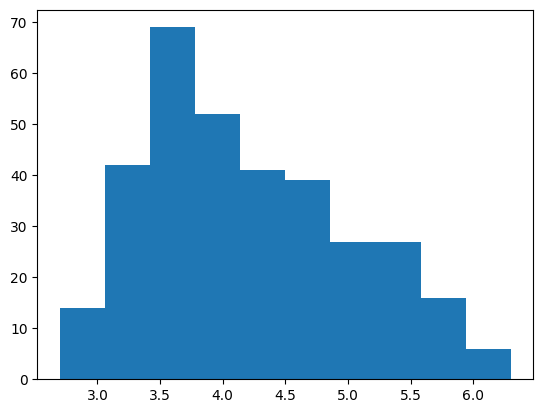

In [ ]:
plt.hist(penguins.body_mass)

In [ ]:
clmn_list = ['bill_length',
             'bill_depth',
             'flipper_length',
             'body_mass'
             ]
peng =  penguins.loc[:,clmn_list]

In [ ]:
peng

,bill_length,bill_depth,flipper_length,body_mass
0,3.91,1.87,18.1,3.750
1,3.95,1.74,18.6,3.800
2,4.03,1.80,19.5,3.250
4,3.67,1.93,19.3,3.450
5,3.93,2.06,19.0,3.650
...,...,...,...,...
339,5.58,1.98,20.7,4.000
340,4.35,1.81,20.2,3.400
341,4.96,1.82,19.3,3.775
342,5.08,1.90,21.0,4.100


In [ ]:
clmn_list = ['bill_length',
             'bill_depth',
             'flipper_length'
             ]
X =  peng.loc[:,clmn_list]
Y = peng.body_mass.to_numpy()

In [ ]:
with pm.Model() as model_pengall:
    s = pm.HalfNormal('s',20)
    μ_ = pmb.BART("μ_", X, np.log(Y), m=50)
    μ = pm.Deterministic("μ",pm.math.exp(μ_))
    y = pm.Normal("y", mu=μ, sigma=s,  observed=Y)
    idata_pengall = pm.sample(compute_convergence_checks=False)

Output()

Output()

<Axes: xlabel='y'>

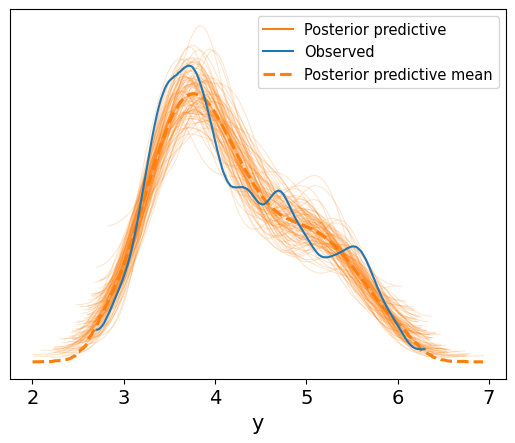

In [ ]:
pm.sample_posterior_predictive(idata_pengall,model_pengall, extend_inferencedata=True)
az.plot_ppc(idata_pengall, num_pp_samples=100, colors=["C1", "C0", "C1"])

**Task7**:

Plot flipper length versus body mass,

and then plot the posterior predictve from the model over the data.
You're going to copy paste the plotting code from the notes, fyi.

<Axes: xlabel='flipper_length', ylabel='body_mass'>

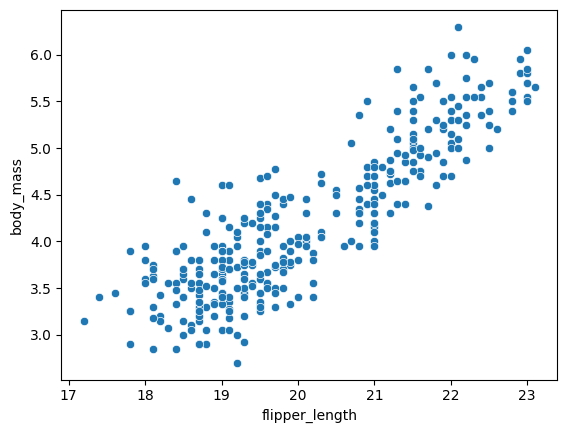

In [ ]:
sns.scatterplot(data = penguins, x = 'flipper_length', y = 'body_mass')

In [ ]:
posterior_mean = idata_pengall.posterior["μ"]

μ_hdi = az.hdi(ary=idata_pengall, group="posterior", var_names=["μ"], hdi_prob=0.74)

pps = az.extract(
    idata_pengall, group="posterior_predictive", var_names=["y"]
).T

/usr/local/lib/python3.11/dist-packages/arviz/plots/hdiplot.py:166: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


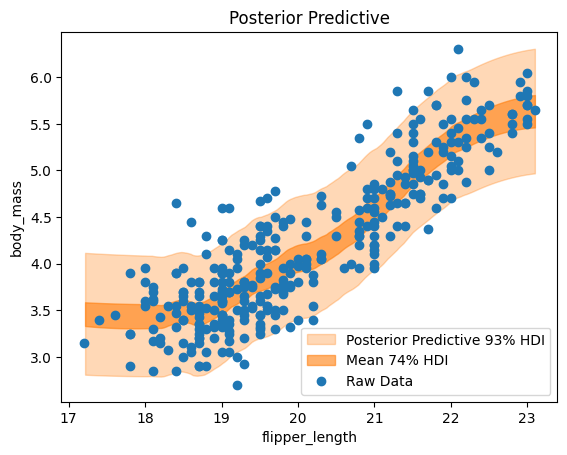

In [ ]:
idx = peng.flipper_length
fig, ax = plt.subplots()

az.plot_hdi(
    x=peng.flipper_length,
    y=pps,
    ax=ax,
    hdi_prob=0.93,
    fill_kwargs={"alpha": 0.3, "label": r"Posterior Predictive 93% HDI"},
)

az.plot_hdi(
    x=peng.flipper_length,
    y=posterior_mean,
    ax=ax,
    hdi_prob=0.74,
    fill_kwargs={"alpha": 0.6, "label": r"Mean 74% HDI"},
)
ax.plot(penguins["flipper_length"], penguins["body_mass"], "o", c="C0", label="Raw Data")
ax.legend(loc="lower right")
ax.set(
    title="Posterior Predictive",
    xlabel="flipper_length",
    ylabel="body_mass",
);

**Task8**:

Interpret the plot above in context. Do you think it captures the true association between flipper length and body mass in penguins? Why or why not? Make sure to reference specific things you see in the plot.

I think that this model does a pretty good job of capturing the true association between flipper length and body mass. The model generally follows the observed data well, predicting a gentle upward slope. The posterior predictive is too flat near the left and right edges of the graph, which is an artifact of it being a BART model. I think that the trend should probably continue to be sloped rather than flat at the edges, so that's a bit off. The model also predicts what seems to be a pretty acceptable level of variance; most of the data falls within the 93% HDI. In the real world, I would predict to see a positive correlation between flipper length and body mass, so it's good to see that the model thinks that as well. Similar to the human body weight data based on height that we did last unit, maybe it would make sense to see a cubic trend because of the 3d nature of mass being correlated to volume. That would explain why the model has the flat parts on the edges, making it seem more cubic, but I'm not entirely sure.

**Task9**:

Create partial depnedence plots (pdps), individual conditional expectation (ice) plots, and a variable importance plot for the BARTpenguin model.

array([<Axes: xlabel='bill_length'>, <Axes: xlabel='bill_depth'>,
       <Axes: xlabel='flipper_length'>], dtype=object)

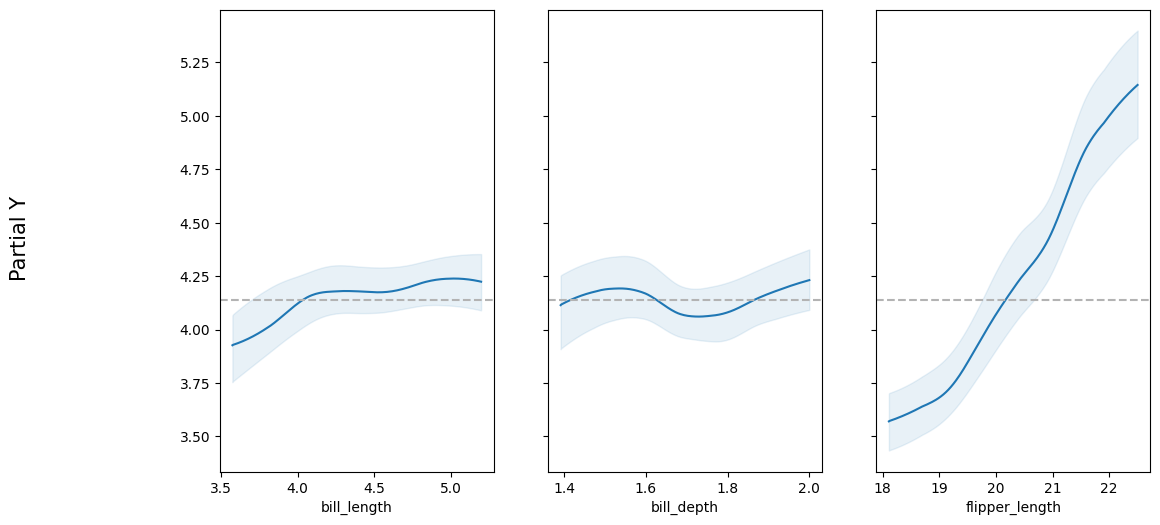

In [ ]:
pmb.plot_pdp(μ_, X, Y, grid=(1, 3), func=np.exp, figsize = (12,6))

array([<Axes: xlabel='bill_length'>, <Axes: xlabel='bill_depth'>,
       <Axes: xlabel='flipper_length'>], dtype=object)

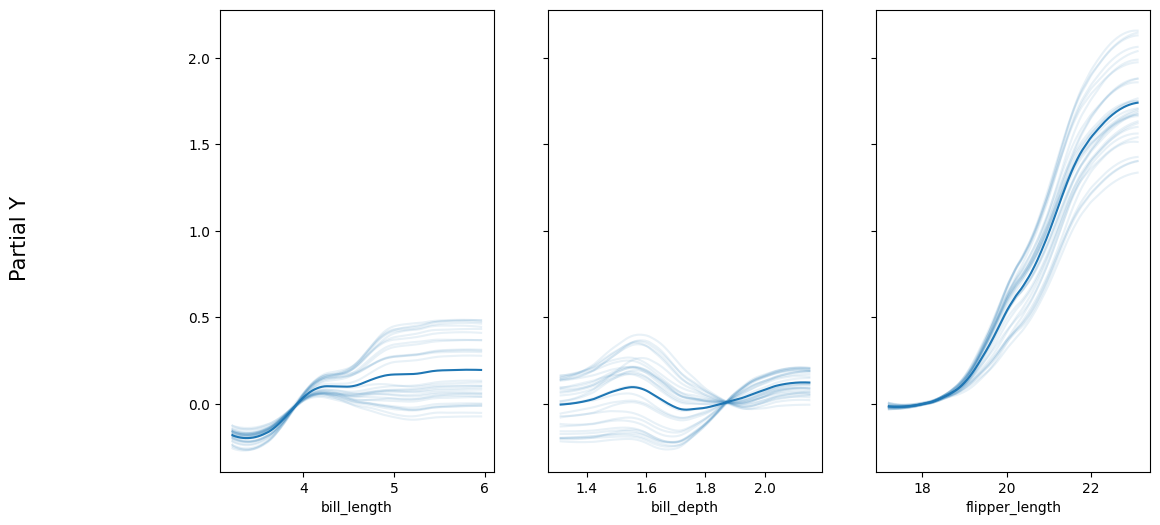

In [ ]:
pmb.plot_ice( μ_, X, Y, grid=(1, 3), func=np.exp, figsize = (12,6))

In [ ]:
vi_pengall = pmb.compute_variable_importance(idata_pengall, μ_, X)

<Axes: ylabel='R²'>

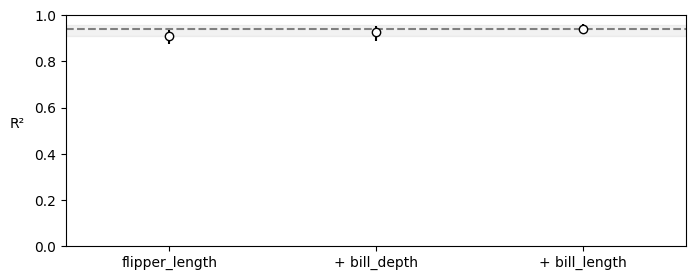

In [ ]:
pmb.plot_variable_importance(vi_pengall)

**Task10**:

Using the above plots, make an argument about which variable(s) is/are most important in predicting body mass in penguins.

What is the relationship for each variable to body mass, when you take the other variables into account?

Is that relationship complicated by interactions between variables? How do you know?

Make sure to reference specific things you see in each plot, to justify your decisions and comments.

Flipper length is by far the most important variable for predicting body mass in penguins.

In the pdp, we can see that there is a strong positive correlation between flipper length and body mass. Bill depth shows basically zero correlation to body mass, and bill length seems pretty negligible as well, given both of their flatness.

In the ice plot, both flipper and bill length have extremely stable correlations to body mass for low numbers in both variables. Bill depth is kind of all over the place as a predictor, but not very stable anywhere (especially in the middle), and not much of a strong correlation to body mass at all. The plot shows that higher bill lengths are less reliable predictors of body mass, as there are many different dergrees of severity but all flat, while flipper lengt remains a positive stable predictor of body mass over basically all values.

Bill depth absolutely needs interactions with other variables to become a useful predictor, and bill length could likely use it as well. Flipper length seems to be a good predictor all on its own, so it's relationship isn't complicated by other variables.

The vi plot confirms my belief that flipper length alone should be sufficient to predict body mass. We get well into the upper 90s for R squared value with just flipper length, and bill length/depth both don't add to much. This means that the model would be about as accurate with just flipper length as it is with all 3.